- **Author:** Jaime Carrasco
- **Fecha:** Septiembre, 2024
- **Curso:** Investigación de Operaciones II

In [6]:
from IPython.display import display, Markdown
import sympy as sym
# Definimos las variables y parámetros:
p, q, n = sym.symbols('p q n')

# Definimos las matriz de transición P:
P = sym.Matrix([
    [p, 1-p, 0],
    [0, 0, 1],
    [1-q, 0, q]
])
P

Matrix([
[    p, 1 - p, 0],
[    0,     0, 1],
[1 - q,     0, q]])

Podemos cargar la librería [itikz](https://github.com/jbn/itikz) para hacer el gráfico asociado en Latex:

In [2]:
%load_ext itikz

Luego, generamos el gráfico asociado con la librería [Tikz](https://tikz.net)

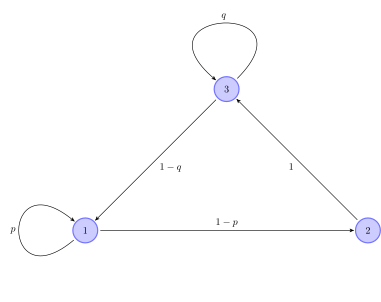

In [5]:
%%itikz
\documentclass[tikz]{standalone}
\usetikzlibrary{automata, positioning, arrows}
\tikzset{
	->,  % makes the edges directed
	>=stealth, % makes the arrow heads bold
	shorten >=2pt, shorten <=2pt, % shorten the arrow
	node distance=3cm, % specifies the minimum distance between two nodes. Change if n
	every state/.style={draw=blue!55,very thick,fill=blue!20}, % sets the properties for each ’state’ n
	initial text=$ $, % sets the text that appears on the start arrow
 }

\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.5cm,
                    semithick]

  % Definición de los nodos
  \node[state] (A)    at (0,0)              {$1$};
  \node[state] (B)    at (10,0)             {$2$};
  \node[state] (C)    at (5,5)              {$3$};

  % Definición de las aristas
  \path (A) edge [loop left, in=140, out=220, looseness=15]  node {$p$} (A)
            edge              node {$1-p$} (B)
        (B) edge              node {$1$} (C)
            
        (C) edge [loop above, in=140, out=45, looseness=15] node {$q$} (C)
            edge                                            node {$1-q$} (A);
\end{tikzpicture}
\end{document}

### Recurrencia
Recordemos lo que significa que un estado sea recurrente.
Definamos lo siguiente:

- $f_{ij}^{\left( n\right) }:=$ probabilidad que la cadena visite por
primera vez al estado $j$ en la etapa $n$ partiendo de $i$. 

$$ 
f_{ij}^{\left( n\right) }=\mathbb{P}\left(X_{n}=j,X_{n-1}\not=j,X_{n-2}\not=j,...,X_{1}\not=j\mid X_{0}=i\right) 
$$


- $f_{ij}:=$ probabilidad de entrar al estado $j$ en algúna etapa
comenzando en $i$. 
$$
f_{ij}=\sum\limits_{n=1}^{\infty }f_{ij}^{\left( n\right) } 
$$

**Definición**: Diremos que $j$ es _recurrente_ ssi $f_{jj}=1$, y  _transiente_ (o _transitorio_) si $f_{jj}<1$.

Analicemos si es estado $j=1$ es transitorio o recurrente.
Notamos que 
- $f_{11}^{(1)} = p$,
- $f_{11}^{(2)} = 0$,
- $f_{11}^{(3)} = (1-p)\cdot 1 \cdot (1-q)$,
- y en general, para $n \geq 3$, $f_{11}^{(n)} = (1-p)\cdot 1 \cdot q^{n-3} \cdot (1-q)$.
Así,
$$
\begin{align*}
f_{11} &= \sum\limits_{n=1}^{\infty }f_{11}^{\left( n\right) } \\
       &= f_{11}^{(1)} + f_{11}^{(2)} + \sum\limits_{n=3}^{\infty} (1-p)\cdot 1 \cdot q^{n-3} \cdot (1-q) \\
       &= p + \sum\limits_{n=3}^{\infty} (1-p)\cdot 1 \cdot q^{n-3} \cdot (1-q).
\end{align*}
$$

Resolvamos esta serie con Sympy:

In [9]:
f11 = p + sym.Sum((1-p)*q**(n-3)*(1-q),(n,3,sym.oo))
f11

p + Sum(q**(n - 3)*(1 - p)*(1 - q), (n, 3, oo))

In [10]:
f11_valor = sym.simplify(f11.doit())
f11_valor

Piecewise((1, (q > -1) & (q < 1)), (p + (p*q - p - q + 1)*Sum(q**(n - 3), (n, 3, oo)), True))

De lo anterior, como $q < 1 $, implica $f_{11} = 1$, y por tanto el estado $1$ es recurrente.

### ¿Cuál es el tiempo esperado del 1er retorno para el estado $1$?

Definamos lo siguiente:
Supongamos la cadena empieza en $X_{0}=i$. Definamos:

- $T_{i}:=$ instante del primer acceso al estado $i$.

- $T_{i}=n\Leftrightarrow X_{n}=i,X_{n-1}\not=i,...,X_{1}\not=i$

- Luego 
$$
\mathbb{P}\left( T_{i}=n\right) =f_{ii}^{\left( n\right) }
$$

- Número de transiciones esperadas de retorno:
$$
\mu _{ii}:=\mathbb{E}\left[ T_{i}\mid X_{0}=i\right] =\sum\limits_{i=1}^{%
\infty }nf_{ii}^{\left( n\right) }.
$$

Resolvamos esta serie con Sympy:

In [15]:
mu_11 = p + sym.Sum(n*(1-p)*q**(n-3)*(1-q),(n,3,sym.oo)) # Ojo: sym.oo significa "infinito"
mu_11

p + Sum(n*q**(n - 3)*(1 - p)*(1 - q), (n, 3, oo))

In [14]:
mu_11_valor = sym.simplify(mu_11.doit())
mu_11_valor

Piecewise(((-p*q + 2*p + 2*q - 3)/(q - 1), (q > -1) & (q < 1)), (p + (p*q - p - q + 1)*Sum(n*q**(n - 3), (n, 3, oo)), True))

Como $q<1$, implica $\mu_{11} = \dfrac{-pq+2p+2q-3}{q-1}$, y así $\mu_{11} < \infty$. Decimos en este caso que el estado $1$ es _recurrente_ _positivo_. En el caso que $\mu_{11} = \infty$, diríamos que el estado $1$ es _recurrente_ _nulo_.